In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input/"))

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB

from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

## Keras imports
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout,LSTM
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Conv1D,Dropout,GlobalMaxPool1D,Dense,Activation
import tensorflow as tf

# Any results you write to the current directory are saved as output.

## Visualization Library
from IPython.display import display
import matplotlib.pyplot as plt

['test.csv', 'sample_submission.csv', 'santander-customer-transaction-prediction.zip', 'train.csv']


In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
sample_sub = pd.read_csv('input/sample_submission.csv')

In [3]:
sample_sub.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [4]:
print(train.head())
print("==")
print(train.shape)
print("===")
print(test.head())
print("==")
print(test.shape)

   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266   ...      4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338   ...      7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155   ...      2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250   ...      4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784

In [5]:
train['target'].value_counts(normalize=True)

0    0.89951
1    0.10049
Name: target, dtype: float64

In [6]:
independent_feat = ['var_'+str(i) for i in range(200)]
dependent_feat = 'target'

In [7]:
train[independent_feat].describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
sc = StandardScaler()
train[independent_feat] = sc.fit_transform(train[independent_feat])
test[independent_feat] = sc.transform(test[independent_feat])

In [9]:
train, val = train_test_split(train, test_size=0.20, stratify=train[dependent_feat])
print(train.shape)
print(val.shape)

(160000, 202)
(40000, 202)


### CNN

In [10]:
def plot_history(history):
    auc = history.history['get_auc']
    val_auc = history.history['val_get_auc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(auc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, auc, 'b', label='Training AUC')
    plt.plot(x, val_auc, 'r', label='Validation AUC')
    plt.title('Training and validation AUC')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

def get_auc(y_true, y_pred):
    print("True value {}".format(y_true))
    print("Predicted value {}".format(y_pred))
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [12]:
def get_cnn_data(data):
    return data.values.reshape(data.shape[0], 20, 10, 1)

train_cnn = get_cnn_data(train[independent_feat])
val_cnn = get_cnn_data(val[independent_feat])
test_cnn = get_cnn_data(test[independent_feat])

In [70]:
## Define Model
input_shape = len(independent_feat)

def cnn_v1():
    model = Sequential()
    #add model layers
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(20,10,1)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Conv2D(16, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    #compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[get_auc])
    print(model.summary())
    return model


In [71]:
mode_path = 'output/cnn_v1.h5'
callbacks = [ModelCheckpoint(filepath=mode_path, save_best_only=True)]

In [72]:
## Run Model
print("Compile model ...")
estimator = KerasClassifier(build_fn=cnn_v1, epochs=10, batch_size=64)
history = estimator.fit(train_cnn, train[dependent_feat],\
                        validation_data=(val_cnn,val[dependent_feat]),callbacks=callbacks)

Compile model ...
True value Tensor("dense_11_target:0", shape=(?, ?), dtype=float32)
Predicted value Tensor("dense_11/Sigmoid:0", shape=(?, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 18, 8, 64)         640       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 6, 32)         18464     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 4, 16)         4624      
_________________________________________________________________
flatten_8 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 897       
Total params: 24,625
Trainable params: 24,625
Non-trainable params: 0
____________________________________________

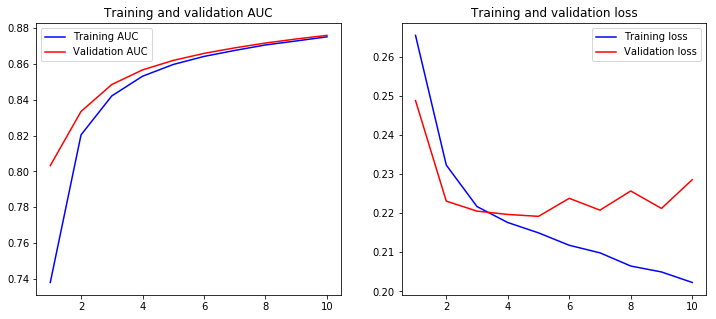

In [73]:
plot_history(history)

In [74]:
# https://github.com/keras-team/keras/issues/5916
model = load_model(mode_path,custom_objects={'get_auc':get_auc})

True value Tensor("dense_11_target_1:0", shape=(?, ?), dtype=float32)
Predicted value Tensor("dense_11_1/Sigmoid:0", shape=(?, 1), dtype=float32)


In [75]:
train_pred = model.predict_proba(train_cnn)
val_pred = model.predict_proba(val_cnn)

In [76]:
train_pred = [i[0] for i in train_pred]
val_pred = [i[0] for i in val_pred]

In [77]:
from sklearn.metrics import roc_auc_score
print("Train auc {}".format(roc_auc_score(train[dependent_feat],train_pred)))
print("Val auc {}".format(roc_auc_score(val[dependent_feat],val_pred)))

Train auc 0.8962922574408874
Val auc 0.8785896428087469


In [50]:
test_pred = model.predict_proba(test_cnn)
test_pred = [i[0] for i in test_pred]

In [51]:
result = pd.DataFrame({'ID_code':test['ID_code'],'target':list(test_pred)})
result.head()

,ID_code,target
0,test_0,0.289155
1,test_1,0.080049
2,test_2,0.307366
3,test_3,0.101556
4,test_4,0.024372


In [52]:
result.to_csv('output/cnn_v1.csv',index=False)

### References


1) https://github.com/keras-team/keras/issues/5916
2) https://www.kaggle.com/stevexyu/kfold-convolutional-neural-network